In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
import torch
import dill as dill 

In [4]:
PATH='data/dogscats/'

In [5]:
model_file = f'{PATH}models/test_resnext50.pt'

In [6]:
model_file

'data/dogscats/models/test_resnext50.pt'

In [8]:
model = torch.load(model_file, pickle_module=dill)

In [25]:
model.cpu()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): Sequential(
      (0): LambdaMap(
        (0): Sequential(
          (0): Sequential(
            (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (2): ReLU()
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (5): ReLU()
          )
          (1): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
        )
        (1): Sequential(
          (0): Conv2d(64, 256, kernel

In [9]:
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): Sequential(
      (0): LambdaMap(
        (0): Sequential(
          (0): Sequential(
            (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (2): ReLU()
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (5): ReLU()
          )
          (1): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
        )
        (1): Sequential(
          (0): Conv2d(64, 256, kernel

In [11]:
from utils import *

In [18]:
import random
import PIL

In [12]:
def get_random_image(dir_name):
    file_name = dir_name + random.choice(os.listdir(dir_name)) 
    return file_name

In [81]:
file = get_random_image(f'{PATH}test1/'); file

'data/dogscats/test1/638.jpg'

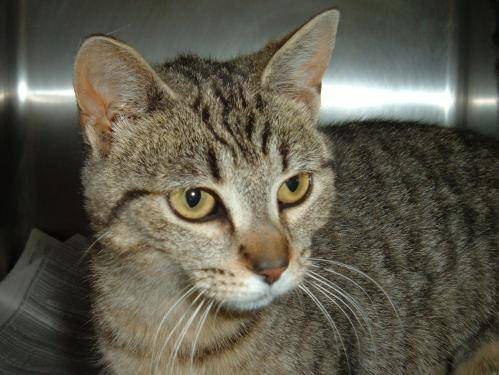

In [82]:
img = PIL.Image.open(file); img

In [83]:
test_img = open_image(file)

In [84]:
p_img = preproc_img(test_img)

In [85]:
log_preds = model(p_img).data.numpy()

In [86]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [87]:
probs, preds

(array([0.00009], dtype=float32), array([0]))

In [88]:
probs_arr = np.exp(log_preds); probs_arr

array([[0.99991, 0.00009]], dtype=float32)